In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv(r"C:\Users\bollapalli bharadwaj\OneDrive\Documents\lab\train.csv")

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
print(df.isnull().sum())
#fill missing values for Age with the median age
df['Age'].fillna(df['Age'].median(),inplace=True)
#fill missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
#Drop unnecessary columns that wont contribute to the analysis
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


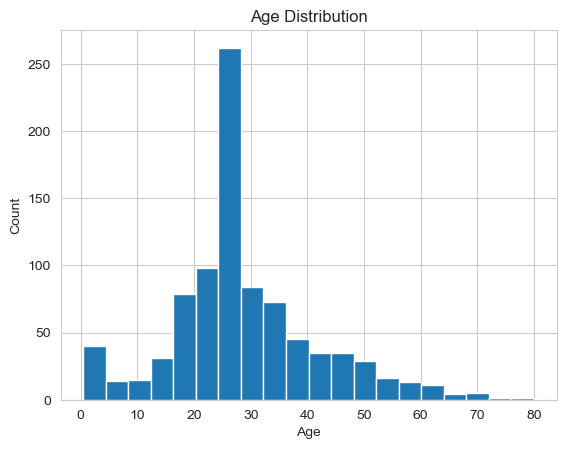

In [47]:
#exploring the age distribution of passengers
plt.hist(df['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

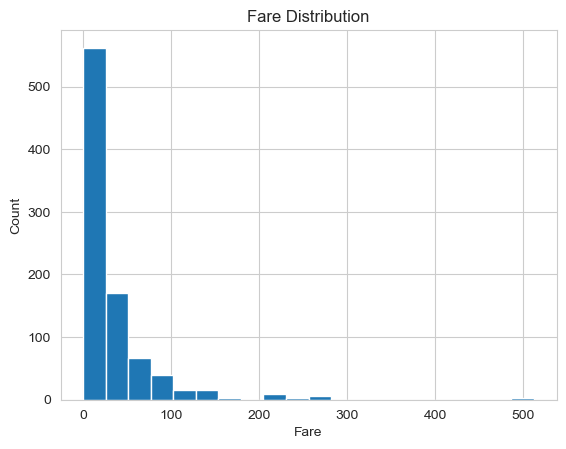

In [48]:
#Exploring the farce distribution of passengers
plt.hist(df['Fare'],bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [49]:
#Exploring the relationship between 'Sex' and 'survived'
sex_survived=df.groupby('Sex')['Survived'].mean()*100
print(f"Survivel rate by sex:\n",sex_survived)

Survivel rate by sex:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


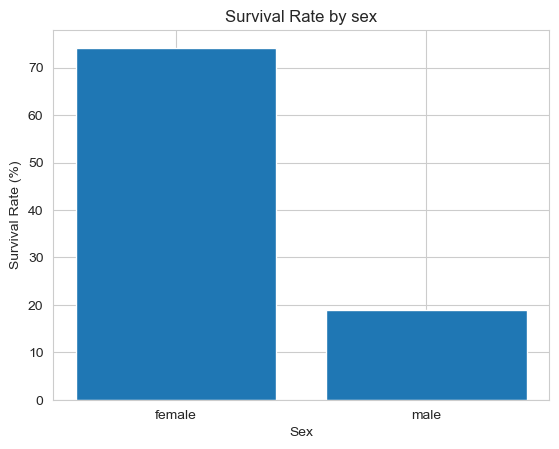

In [50]:
#visualizing the relationship between 'sex' and 'survived'
plt.bar(sex_survived.index ,sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by sex')
plt.show()

In [51]:
pclass_survived = df.groupby('Pclass')['Survived'].mean()*100
print(f"Survival rate by Pclass:\n",pclass_survived)

Survival rate by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


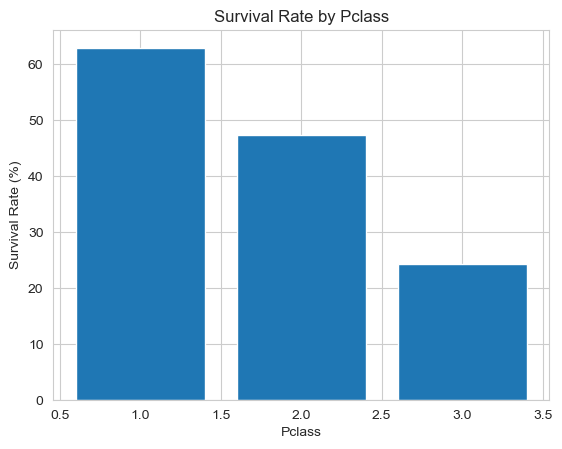

In [52]:
#visualizing the relationship between 'Pclass and 'Survived'
plt.bar(pclass_survived.index,pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

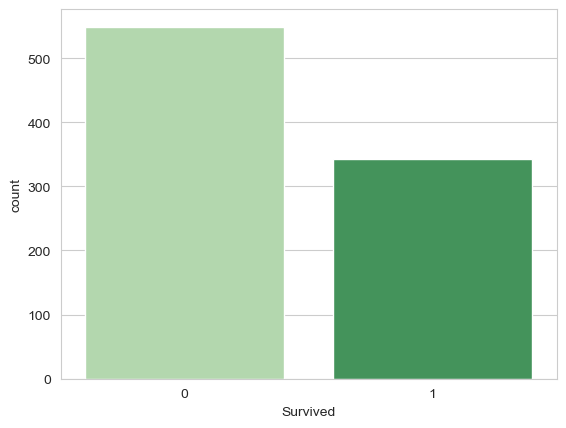

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='Greens')


<Axes: xlabel='Survived', ylabel='count'>

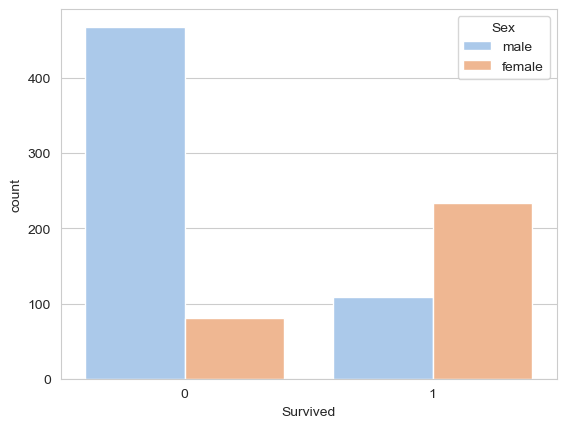

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='pastel')

C:\Users\bollapalli bharadwaj\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


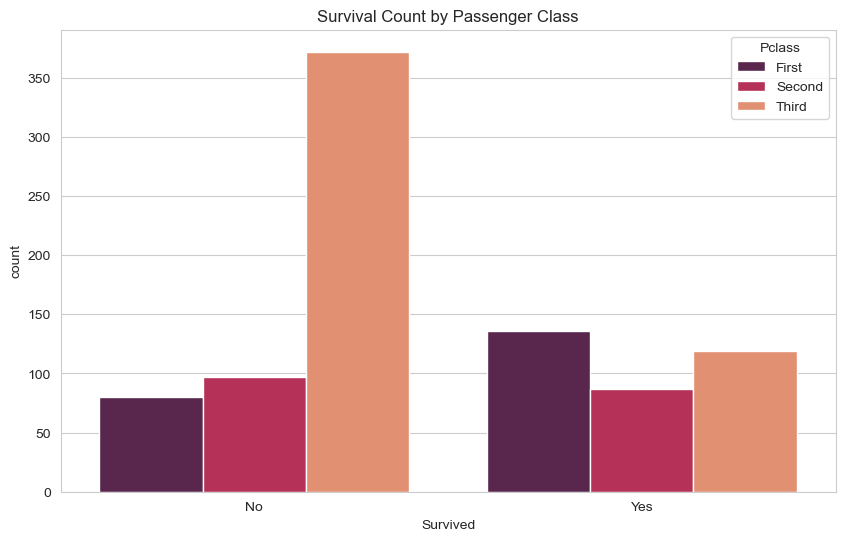

In [73]:

# Ensure 'survived' and 'pclass' are treated as categorical variables
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# Convert the categories to strings
df['Survived'] = df['Survived'].cat.rename_categories({0: 'No', 1: 'Yes'})
df['Pclass'] = df['Pclass'].cat.rename_categories({1: 'First', 2: 'Second', 3: 'Third'})

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rocket')
plt.title('Survival Count by Passenger Class')
plt.show()

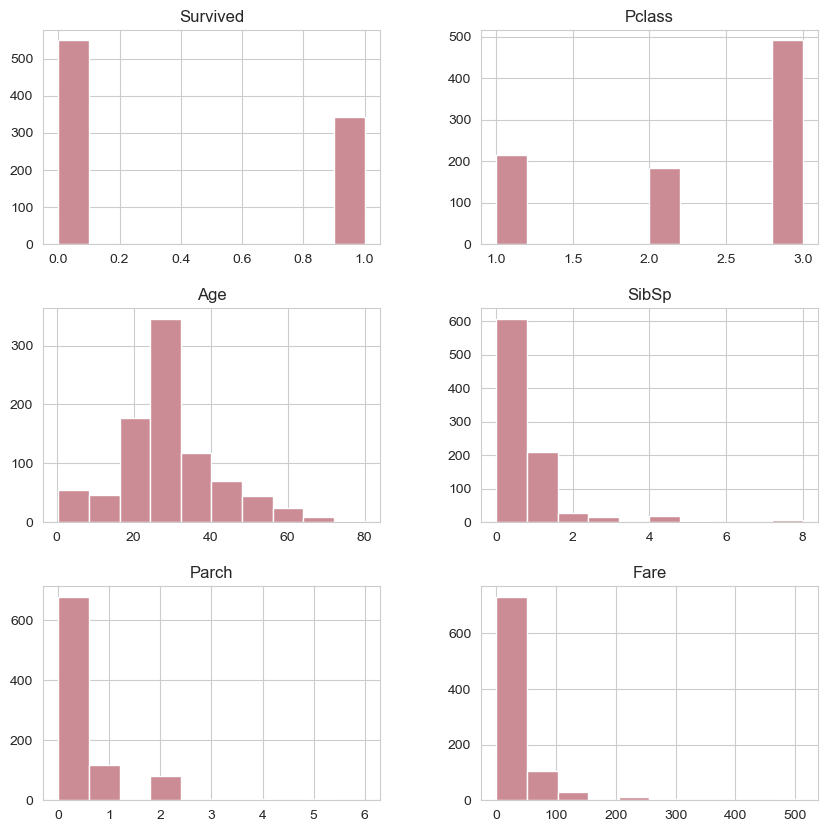

In [65]:
df.hist(figsize=(10,10),color='#CB8C95')
plt.show()

C:\Users\bollapalli bharadwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bollapalli bharadwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bollapalli bharadwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bollapalli bharadwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

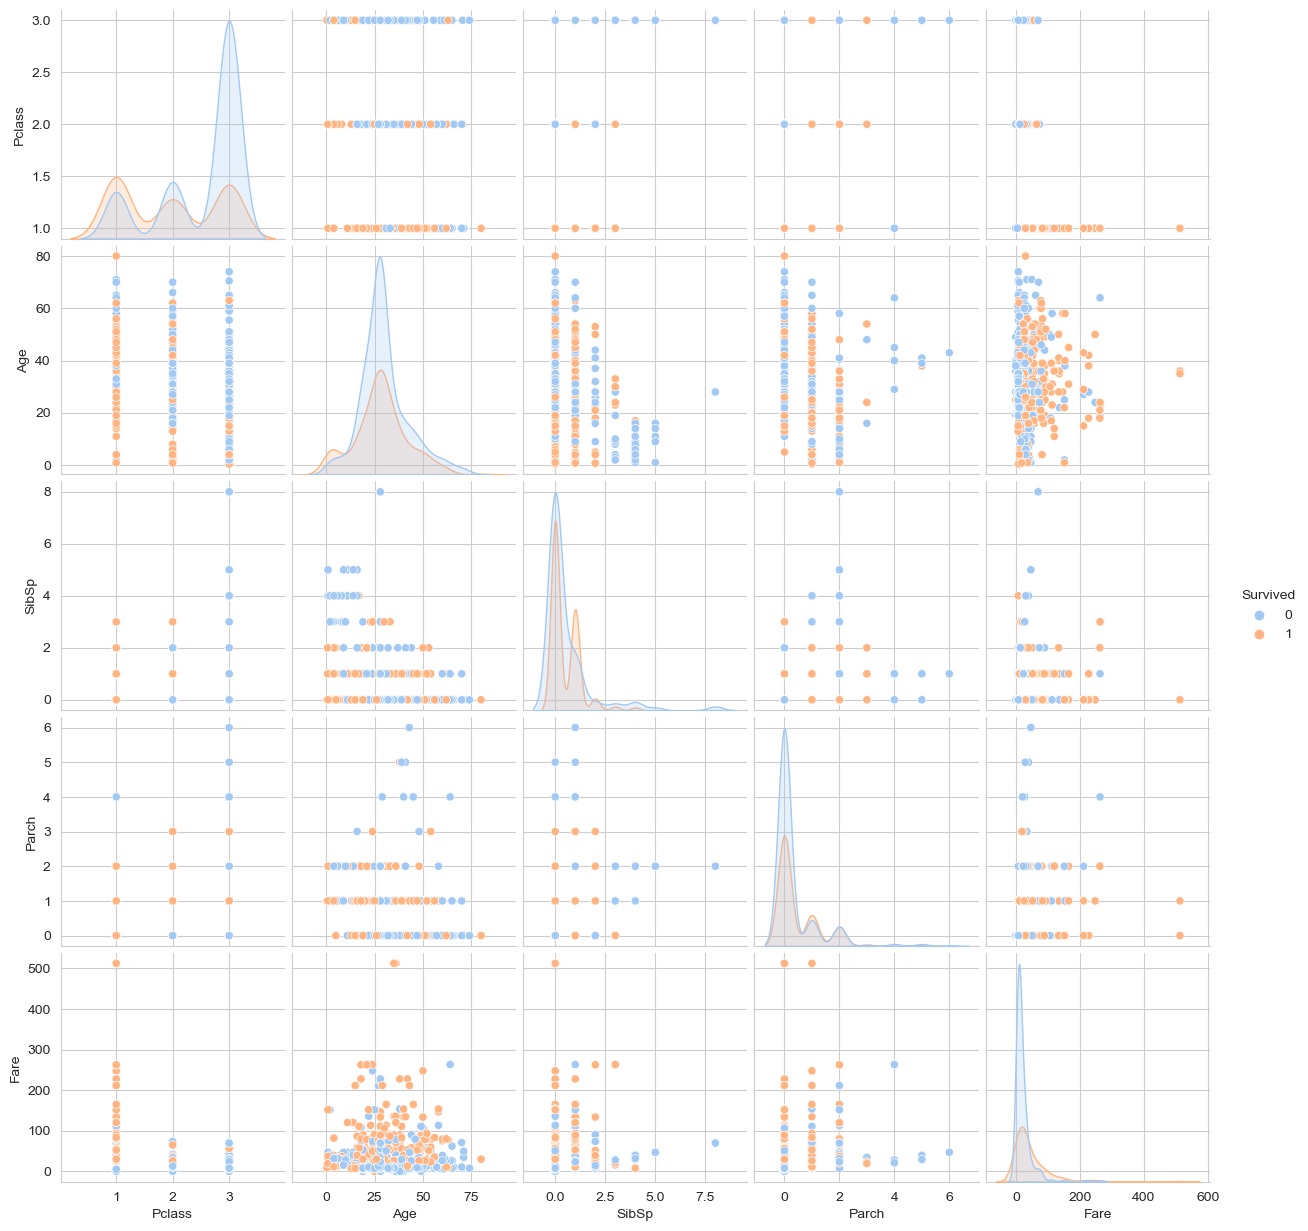

In [68]:
sns.pairplot(df,hue='Survived',palette='pastel')
plt.show()

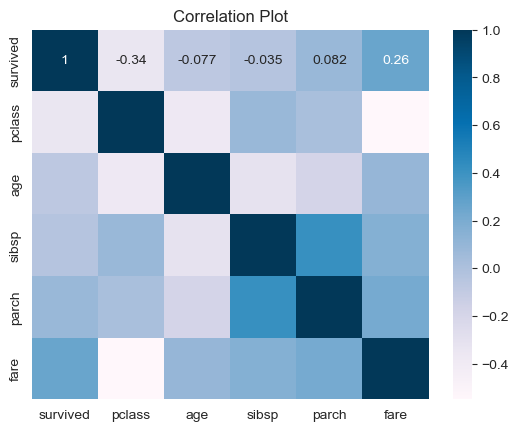

In [74]:
df = sns.load_dataset('titanic')
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='PuBu')
plt.title('Correlation Plot')
plt.show()